In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("spending.csv")
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [3]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [6]:
df.rename(columns={'Annual Income ($)': 'Annual_Income','Spending Score (1-100)': 'Spending_Score'}, inplace=True)

In [7]:
df.head(1)

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4


In [8]:
df = df[df['Annual_Income'] != 0]

In [9]:
duplicate_count = df['CustomerID'].duplicated().sum()

In [10]:
print("Total duplicate CustomerID:", duplicate_count)

Total duplicate CustomerID: 0


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
sns.set(style="whitegrid")

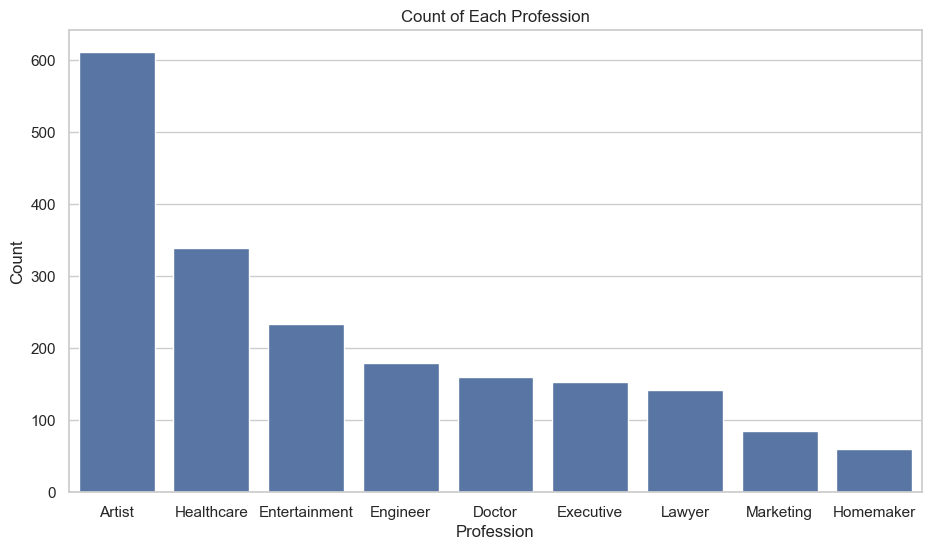

In [13]:
plt.figure(figsize=(11,6))
sns.countplot(x='Profession', data=df, order=df['Profession'].value_counts().index)
plt.xlabel('Profession')
plt.ylabel('Count')
plt.title('Count of Each Profession')
plt.show()

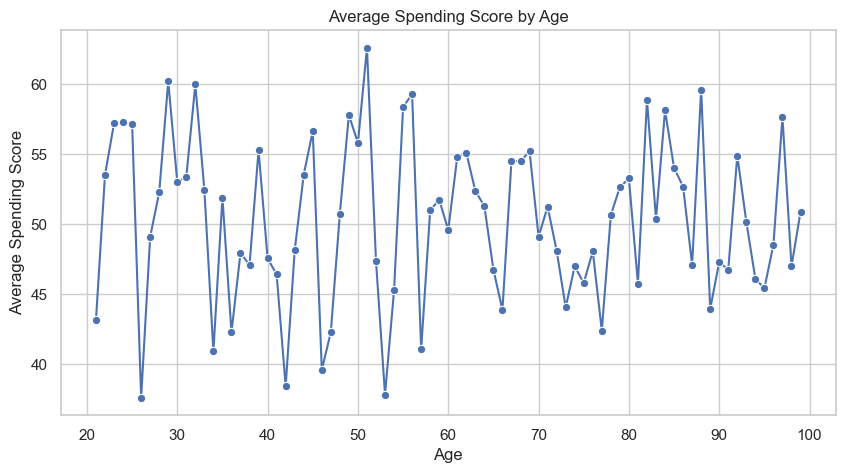

In [14]:
age_score = df.groupby('Age')['Spending_Score'].mean().reset_index()
age_score = age_score[age_score['Age'] > 20]
plt.figure(figsize=(10,5))
sns.lineplot(x='Age', y='Spending_Score', data=age_score, marker='o')
plt.title("Average Spending Score by Age")
plt.xlabel("Age")
plt.ylabel("Average Spending Score")
plt.show()

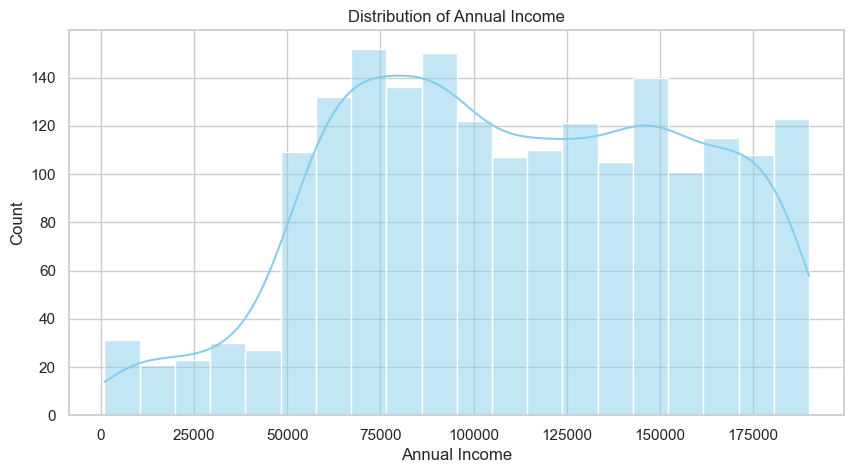

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(df['Annual_Income'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Count")
plt.show()

C:\Users\Sayed\AppData\Local\Temp\ipykernel_20160\500311013.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profession', y='Spending_Score', data=prof_score, palette='pastel')


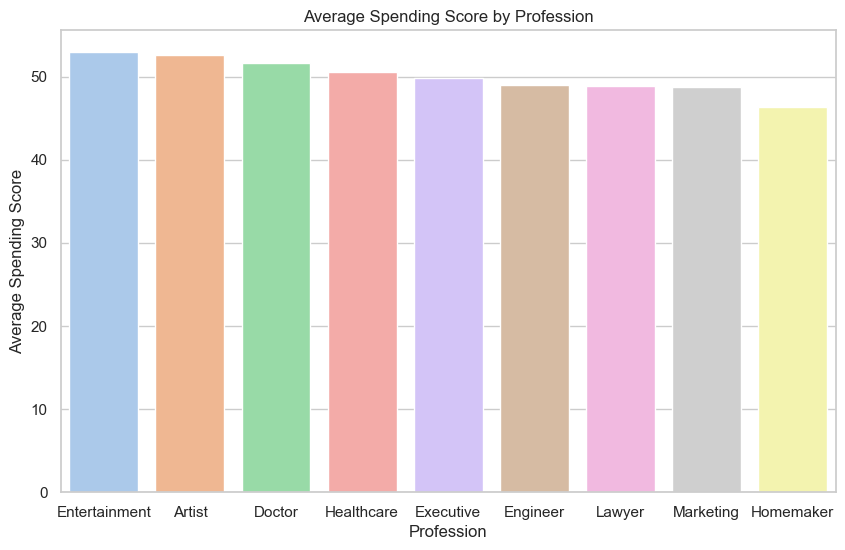

In [16]:
prof_score = df.groupby('Profession')['Spending_Score'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Profession', y='Spending_Score', data=prof_score, palette='pastel')
plt.title("Average Spending Score by Profession")
plt.xlabel("Profession")
plt.ylabel("Average Spending Score")
plt.show()

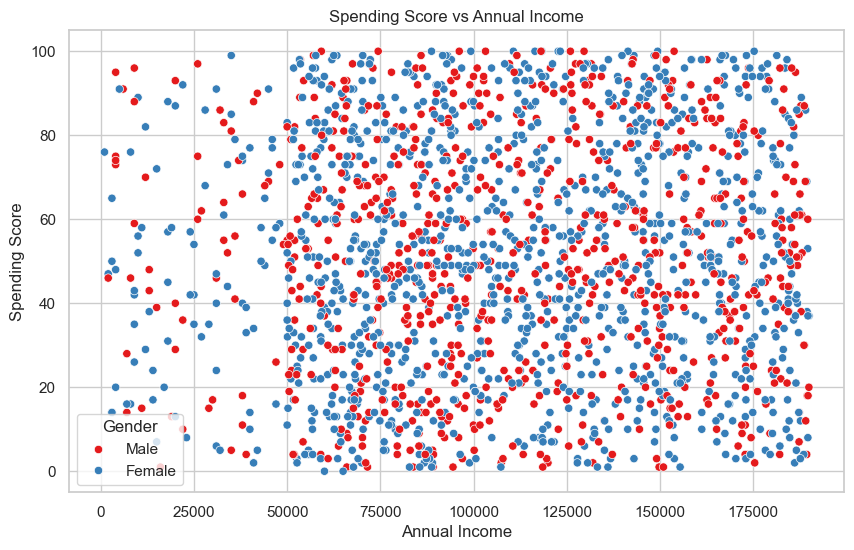

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='Gender', data=df, palette='Set1')
plt.title("Spending Score vs Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

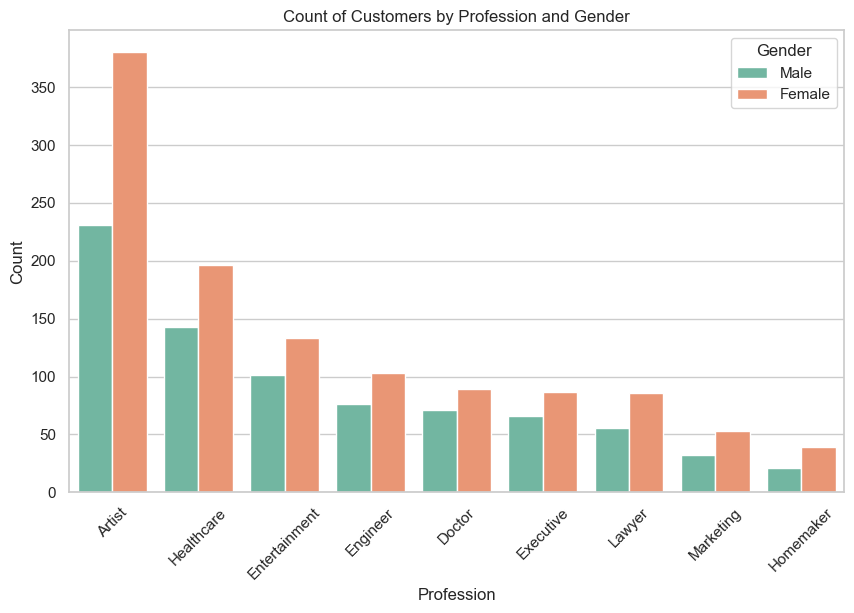

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='Profession', hue='Gender', data=df, order=df['Profession'].value_counts().index, palette='Set2')
plt.xticks(rotation=45)
plt.title("Count of Customers by Profession and Gender")
plt.xlabel("Profession")
plt.ylabel("Count")
plt.show()

In [19]:
data=df.copy()

In [20]:
data.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


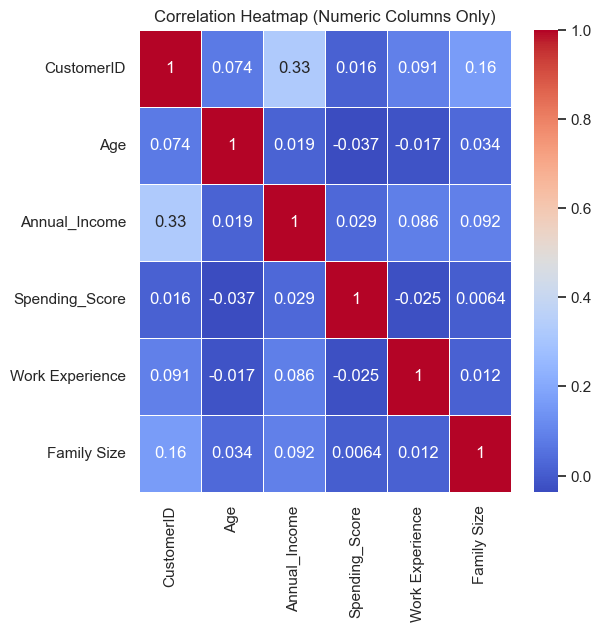

In [21]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(6,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()